<a href="https://colab.research.google.com/github/JaradAng/tensorflow_training/blob/main/CNN_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Get the data
Because convolutional neural networks work so well with images, to learn more about them, we're going to start with a dataset of images.

The images we're going to work with are from the Food-101 dataset, a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes.

To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩 and build a binary classifier.

🔑 Note: To prepare the data we're using, preprocessing steps such as, moving the images into different subset folders, have been done. To see these preprocessing steps check out the preprocessing notebook.

We'll download the pizza_steak subset .zip file and unzip it.

In [3]:

import zipfile

# # Download zip file of pizza_steak images
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# # Unzip the downloaded file
# zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
# zip_ref.extractall()
# zip_ref.close()
     


#inspecting the data to get to know it
a very crucial step at begining of any ml project is to know your data. and for computer vision this means looking at many samples

In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train

pizza  steak


In [5]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [26]:
import os

#walkthru the pizaa steak directory and list num of files

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

In [7]:
num_steak_train = len(os.listdir('pizza_steak/train/steak'))

In [8]:
num_steak_train

750

to vizualize images lets get class names programatically

In [9]:
# get the class names programatically
import pathlib
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) #create list of class names 
print(class_names)

['pizza' 'steak']


In [4]:
#viz the images
import matplotlib.image as mpimg
import random

def view_rand_image(target_dir, target_class):
  #set target directory and view from there
  target_folder = target_dir + target_class

  #get ran image 
  random_image = random.sample(os.listdir(target_folder), 1)

  #read in image and plot
  img = mpimg.imread(target_folder + "/" + random_image[0])

  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f'image shape: {img.shape}')

  return img



image shape: (512, 512, 3)


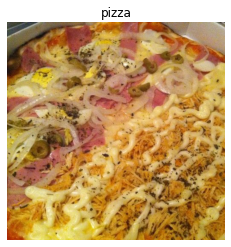

In [11]:
#view random image
img = view_rand_image(target_dir='pizza_steak/train/',
                      target_class='pizza')

In [12]:
##view shape 
img.shape #returns W, h, and color

(512, 512, 3)

## building an end to end cnn 

* load images
* preprocess
* build cnn to find patterns
* compile cnn 
* fit cnn
* evaluate cnn

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#setting seed
tf.random.set_seed(42)

#Preprocess the data to between 0-1 scaling/normalization
train_datagen = ImageDataGenerator(rescale = 1./255) # 255 is max pixels

valid_datagen = ImageDataGenerator(rescale = 1./255)

#Set up path to data directory
train_dir = "/content/pizza_steak/train"

test_dir = 'pizza_steak/test'

#import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               seed = 42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

#Build a cnn model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation= 'relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10,3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size =2,
                             padding='valid'),
    tf.keras.layers.Conv2D(10,3, activation = 'relu'),
    tf.keras.layers.Conv2D(10,3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#fit the model
history_1 = model_1.fit(train_data, 
                        epochs = 5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 116s 2s/step - loss: 0.6028 - accuracy: 0.6747 - val_loss: 0.4746 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 114s 2s/step - loss: 0.4441 - accuracy: 0.7973 - val_loss: 0.4298 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 113s 2s/step - loss: 0.4112 - accuracy: 0.8240 - val_loss: 0.3225 - val_accuracy: 0.8680
Epoch 4/5
47/47 [==============================] - 115s 2s/step - loss: 0.3537 - accuracy: 0.8493 - val_loss: 0.4956 - val_accuracy: 0.7640
Epoch 5/5
47/47 [==============================] - 113s 2s/step - loss: 0.3435 - accuracy: 0.8533 - val_loss: 0.3157 - val_accuracy: 0.8740


In [14]:
#using a noncnn model to see how it works on image

#set seed. 
tf.random.set_seed(42)

#build model 
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(4 , activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_2 = model_2.fit(train_data, epochs =5,
                        steps_per_epoch= len(train_data),
                        validation_data= valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 231ms/step - loss: 0.7620 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 11s 225ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 11s 229ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 223ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 11s 226ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [15]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [16]:
#Trying to improve noncnn model

#Set see
tf.random.set_seed(42)

#Build model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
    
])

#compile
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#fit
history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 15s 311ms/step - loss: 3.7899 - accuracy: 0.6547 - val_loss: 1.2835 - val_accuracy: 0.7040
Epoch 2/5
47/47 [==============================] - 14s 302ms/step - loss: 1.0147 - accuracy: 0.7007 - val_loss: 0.5833 - val_accuracy: 0.7800
Epoch 3/5
47/47 [==============================] - 14s 300ms/step - loss: 0.5997 - accuracy: 0.7420 - val_loss: 0.9280 - val_accuracy: 0.6440
Epoch 4/5
47/47 [==============================] - 14s 298ms/step - loss: 0.5950 - accuracy: 0.7620 - val_loss: 0.6025 - val_accuracy: 0.7300
Epoch 5/5
47/47 [==============================] - 14s 296ms/step - loss: 0.5422 - accuracy: 0.7627 - val_loss: 0.4513 - val_accuracy: 0.7680


In [17]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,063,101
Trainable params: 15,063,101
Non-trainable params: 0
_________________________________________________________________


There are less trainable parameters in CNN but they are more efficient than nonCNN. Usually better than dense networks to still get a restult but not as good. 

## Breaking down binary classification
1. Vizulise the data
2. preprocess the data, scaling/normalizing
3. created a model start with baseline
4. fit the model
5. eval the model
6. adjust parameters and try to improve the model
7. repeat until satisfied

image shape: (384, 512, 3)
image shape: (512, 512, 3)


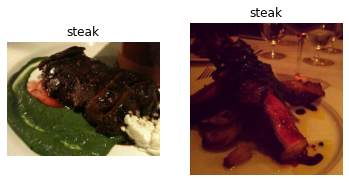

In [18]:
#viz the data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_rand_image('pizza_steak/train/', 'steak')
plt.subplot(1,2,2)
pizza_img= view_rand_image('pizza_steak/train/', 'steak')

In [19]:
#Preprocess the data
#Define directory dataset paths

train_dir = 'pizza_steak/train/'

test_dir = 'pizza_steak/test/'

#Our next step is to turn data into batches

a batch is a small subset of data, instead of looking at all 1500 images at one time it will only look a batch

It does this because:
1. all the images might not fit into the GPU
2. trying to learn patterns in all the images could result in model not being able to learn very well. 

Why is default batch 32?
because it is good for your health... yann le cunn 

In [20]:
#create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.) # will rescale our imaages

test_datagen = ImageDataGenerator(rescale = 1/255.)

In [21]:
#load in image data from directories and turn them into batches

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224,224), #target size of images ( hieght and width)
                                               class_mode='binary', #type of categorical, binary, or sparse
                                               batch_size= 32) #Size of mini batches to load data into

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size= (224,224),
                                             class_mode='binary',
                                             batch_size= 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [22]:
#get a sample of a train data batch
images, labels = train_data.next() #get the next batch of images and labels

In [23]:
len(images), len(labels)

(32, 32)

In [24]:
#how many batches are there
len(train_data) # matches the 1500 / 32 for our batch size

47

In [25]:
#lets look at first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [26]:
#View the labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### Create a CNN model starting with a baseline

A baseline is simple model or existing result when beginining machine learning experiment and as you keep experimenting you try to beat baseline

Its important to make baseline and introduce complexity as you go forward

In [5]:
#creating model a bit easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [28]:
#create baseline 3 layer CNN
model_4 = Sequential([
    Conv2D(filters=10, #filters is the number of sliding windows going across an input
           kernel_size=3, # size of sliding window going across an input
           strides=1, #size of the step the sliding window takes across an input
           padding='valid', #if same, the output shape is the same as input shape, if valid the output shape gets compressed 
           activation='relu',
           input_shape=(224, 224, 3)), #input layer since specify the input shape
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10,3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid') #output layer with binary classification to only 1 output neuron
])




In [29]:
#compile
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [30]:
#fit the model
history_4 = model_4.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 136s 3s/step - loss: 1.2587 - accuracy: 0.6060 - val_loss: 0.5494 - val_accuracy: 0.7440
Epoch 2/5
47/47 [==============================] - 137s 3s/step - loss: 0.4708 - accuracy: 0.7813 - val_loss: 0.4294 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 127s 3s/step - loss: 0.3288 - accuracy: 0.8620 - val_loss: 0.3536 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 136s 3s/step - loss: 0.2369 - accuracy: 0.9107 - val_loss: 0.4696 - val_accuracy: 0.8060
Epoch 5/5
47/47 [==============================] - 128s 3s/step - loss: 0.1211 - accuracy: 0.9700 - val_loss: 0.6559 - val_accuracy: 0.7540


### Evaluating the model 

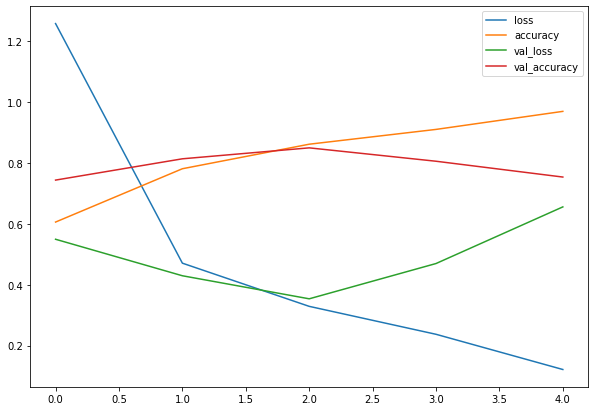

In [31]:
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [21]:
#plot validation and training seperately 
def plot_loss_curve(history):
  """
  returns seperate loss curves for training and validation metrics
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  #plot the loss
  plt.plot(epochs, loss, label='training loss')
  plt.plot(epochs, val_loss, label='validation loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend();

  #plot the accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training accuracy')
  plt.plot(epochs, val_accuracy, label='validation accuracy')
  plt.title('training')
  plt.xlabel('epochs')
  plt.legend();

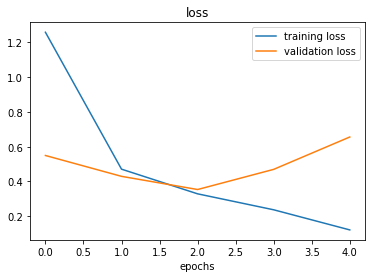

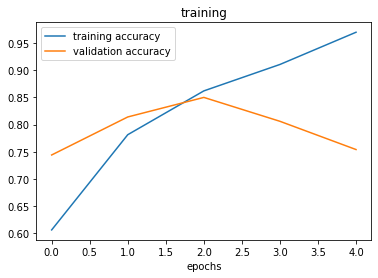

In [33]:
#check out loss and accuracy of model 4
plot_loss_curve(history_4)

when a model validation loss starts to increase, its likely that the model is ** over fitting ** the training data set. this means its learning patterns in training data too well and models ability to generalize to unseen data is diminished

###6. Adjusting model parameters

0. create a baseline
1. beat baseline by overtting a larger model
2. reduce overfitting

Ways to induce overfitting
1. increase number of conv layers
2. increase number of conv filters
3. add naother dense layer to the output of our flattened layer.

Ways to reduce overfitting
1. add data augmentation
2. add regularization layers ie. maxpool
3. add more data

In [34]:
#create model with less overfitting adding in maxpool
model_5 = Sequential([
    Conv2D(10, 3, 
           activation = 'relu',
           input_shape=(224, 224, 3),),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [35]:
#compile the model
model_5.compile(loss= 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

In [36]:
#fit
history_5 = model_5.fit(train_data,
                        epochs =5,
                        steps_per_epoch = len(train_data),
                        validation_data= valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 56s 1s/step - loss: 0.6609 - accuracy: 0.5987 - val_loss: 0.5119 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 55s 1s/step - loss: 0.4755 - accuracy: 0.7773 - val_loss: 0.3754 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 55s 1s/step - loss: 0.4149 - accuracy: 0.8167 - val_loss: 0.3437 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 55s 1s/step - loss: 0.3828 - accuracy: 0.8307 - val_loss: 0.3427 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 57s 1s/step - loss: 0.4134 - accuracy: 0.8180 - val_loss: 0.3591 - val_accuracy: 0.8400


In [37]:
#Check the summary with max pool
model_5.summary(), model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

(None, None)

Model 5 out perfoms modle 4 with substainally less training params

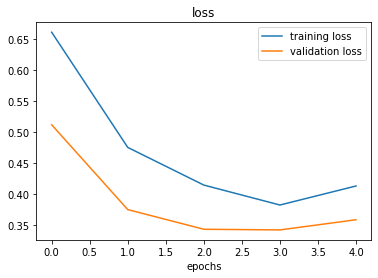

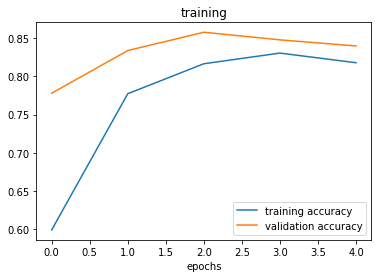

In [38]:
plot_loss_curve(history_5)

### Bringing data augmentation

- Data augmentation is the process of altering our training data leading it to have more diversity to have more diversity. this allows models to be more generalizable patterns and altering might mean adjusting the rotation of an image, cropping etc. 

In [39]:
# Create imagedatagenerator with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/ 255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range =0.3,
                                             horizontal_flip=True)

#Create imagedatagen without augmentatino
train_dategen = ImageDataGenerator(rescale = 1/255.)

#Create imgdatgen without aug for test
test_datagen = ImageDataGenerator(rescale = 1/255.)

#import data and augment it
train_data_augmented = train_datagen_augmented.flow_from_directory('/content/pizza_steak/train',
                                                                   target_size = (224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False)


#non aug data
train_data = train_datagen.flow_from_directory('/content/pizza_steak/train',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)
#non aug test data
test_data = test_datagen.flow_from_directory(test_dir, 
                                             target_size=(224,224),
                                             batch_size =32,
                                             class_mode='binary')

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Data augmentation is only performed on the training data. using imagedatagenerator built in data augmented but only for use in model not the directory

In [40]:
#Gettin some samples
images, labels = train_data.next()

aug_images, aug_labels = train_data_augmented.next()

Text(0.5, 1.0, 'aug img')

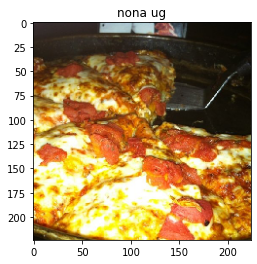

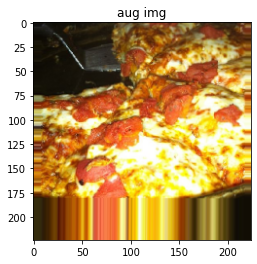

In [41]:
random_number = random.randint(0,31) # to meet batch size
plt.imshow(images[random_number])
plt.title('nona ug')

plt.figure()
plt.imshow(aug_images[random_number])
plt.title('aug img')

In [42]:
#build model with aug data model. 

model_6 = Sequential([
    Conv2D(10, 3,
           activation='relu',
           input_shape = (224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

#compile
model_6.compile(loss = 'binary_crossentropy',
                optimizer= Adam(),
                metrics=['accuracy'])

#Fit
history_6 = model_6.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 71s 1s/step - loss: 0.7089 - accuracy: 0.4827 - val_loss: 0.6874 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 70s 1s/step - loss: 0.6889 - accuracy: 0.4907 - val_loss: 0.6745 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 70s 1s/step - loss: 0.6869 - accuracy: 0.5427 - val_loss: 0.6815 - val_accuracy: 0.5180
Epoch 4/5
47/47 [==============================] - 70s 1s/step - loss: 0.6546 - accuracy: 0.6367 - val_loss: 0.5840 - val_accuracy: 0.7280
Epoch 5/5
47/47 [==============================] - 70s 1s/step - loss: 0.6510 - accuracy: 0.6533 - val_loss: 0.6014 - val_accuracy: 0.6620


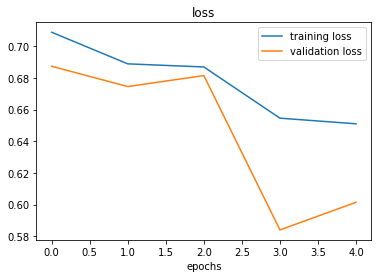

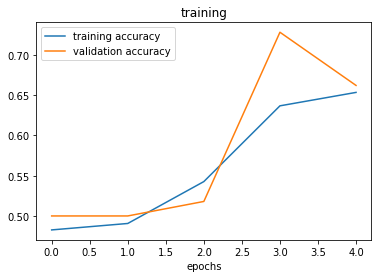

In [43]:
#check the models learning curves
plot_loss_curve(history_6)

In [44]:
#reimport and shuffle

train_aug_shuff = train_datagen_augmented.flow_from_directory(train_dir,
                                                              target_size=(224,224),
                                                              class_mode='binary',
                                                              shuffle=True)

Found 1500 images belonging to 2 classes.


In [45]:
#build a shuffled model
tf.random.set_seed(42)



model_7 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape= (224, 224,3)),
    MaxPool2D(),
    Conv2D(10,3, activation ='relu'),
    MaxPool2D(),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'relu')
])

#compile
model_7.compile(loss='binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])


#fit the model
history_7 = model_7.fit(train_aug_shuff,
                        epochs=5,
                        steps_per_epoch=len(train_aug_shuff),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 70s 1s/step - loss: 0.7533 - accuracy: 0.5413 - val_loss: 0.6301 - val_accuracy: 0.6760
Epoch 2/5
47/47 [==============================] - 68s 1s/step - loss: 0.6727 - accuracy: 0.6267 - val_loss: 0.5265 - val_accuracy: 0.7160
Epoch 3/5
47/47 [==============================] - 68s 1s/step - loss: 0.6541 - accuracy: 0.7367 - val_loss: 0.3967 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 68s 1s/step - loss: 0.5874 - accuracy: 0.7767 - val_loss: 0.4451 - val_accuracy: 0.7920
Epoch 5/5
47/47 [==============================] - 68s 1s/step - loss: 0.6194 - accuracy: 0.7033 - val_loss: 0.4844 - val_accuracy: 0.8440


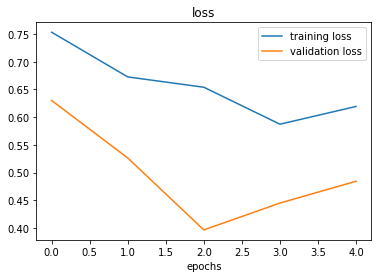

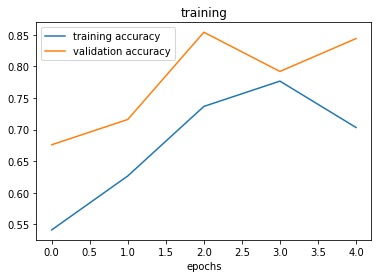

In [46]:
plot_loss_curve(history_7)

Shuffling data allows the model to learn patterns in both at same time rather just pizza or steak

### step 7 repeat to try and improve model

* increase the numdber of model layers add more conv2d and maxpool
* increase the number of filters in each conv layer
* train for longer
* get more data
* use transfer learning to leverage what another image model has learned and adjust it for our own use case

### making prediction with trained model on custom data

In [47]:
from time import clock_settime
# Check classes again
class_names

array(['pizza', 'steak'], dtype='<U5')

In [49]:
#view expample image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

steak = mpimg.imread('03-steak.jpeg')

--2022-12-07 15:14:49--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2022-12-07 15:14:49 (32.7 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



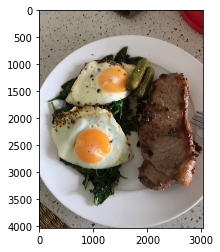

In [50]:
plt.imshow(steak)

In [51]:
steak.shape
#shape is too big to put into model and runs into shape issue

(4032, 3024, 3)

In [52]:
#need to prepocess the image to have it work in the model
#creat function to import image and resize it

def load_and_prep_image(filename, img_shape=224):
  """
  reads an image from filename and turns it into a tensore, and reshapes it into (img shape and color)
  """
  #read in image
  img = tf.io.read_file(filename)

  #decode the read file into a tensor
  img = tf.image.decode_image(img)

  #resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])

  #scale the image and get all values between0-1
  img = img/255

  return img

In [53]:
#load in image
steak = load_and_prep_image('03-steak.jpeg')

steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [56]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))

pred

1/1 [==============================] - 0s 38ms/step


array([[0.895435]], dtype=float32)

In [55]:
# remind of class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [57]:
#index the predicted class by rounding prediciton prob and indexing it
pred_class = class_names[int(tf.round(pred))]

pred_class

'steak'

In [63]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  imports an image at filename , makes preditiction with model and plots the image with the predicted class title
  """

  #import the target image and preprocess

  img = load_and_prep_image(filename)

  # make aprediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  #get pred class
  pred_class = class_names[int(tf.round(pred))]

  #plot the image
  plt.imshow(img)
  plt.title(f'prediciton: {pred_class}')
  plt.axis=(False);

1/1 [==============================] - 0s 32ms/step


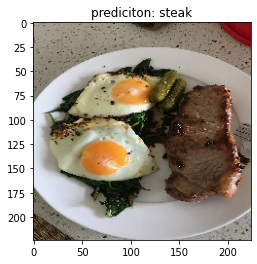

In [64]:
pred_and_plot(model_7, '03-steak.jpeg')

In [65]:
#try another pic
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

pizza = mpimg.imread('03-pizza-dad.jpeg')

--2022-12-07 15:52:21--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2022-12-07 15:52:22 (40.4 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



1/1 [==============================] - 0s 29ms/step


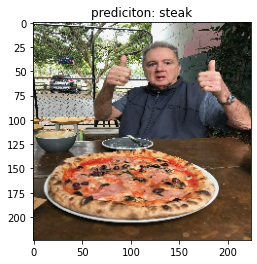

In [67]:
pred_and_plot(model_7, '03-pizza-dad.jpeg')

# moving to multiclassification model 

1. examine the data
2. preprocess the data
3. create a model baseline
4. fit the model  (overfit to make sure it work)
5. evaluate
6. adjust hyperparams to improve and reduce overfit
7. repeat until satisfied. 

In [39]:
 ## import and examine the data

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

 #unzip
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')

zip_ref.extractall()

zip_ref.close()

--2022-12-09 18:19:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 142.250.4.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.2’

10_food_classes_all 100%[===================>] 495.13M  24.2MB/s    in 22s     

2022-12-09 18:20:06 (22.5 MB/s) - ‘10_food_classes_all_data.zip.2’ saved [519183241/519183241]



In [6]:
import os 

# lets check out the data
for dirpath, dirnames, filenames in  os.walk('10_food_classes_all_data'):
  print(f'there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

there are 2 directories and 0 images in 10_food_classes_all_data
there are 10 directories and 0 images in 10_food_classes_all_data/test
there are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger
there are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon
there are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings
there are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry
there are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream
there are 0 directories and 250 images in 10_food_classes_all_data/test/sushi
there are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice
there are 0 directories and 250 images in 10_food_classes_all_data/test/steak
there are 0 directories and 250 images in 10_food_classes_all_data/test/ramen
there are 0 directories and 250 images in 10_food_classes_all_data/test/pizza
there are 10 directories and 0 images in 10_fo

In [8]:
#set up the train and test
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [7]:
#lets get sub directories, class_names
import pathlib

data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))

print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


image shape: (384, 512, 3)


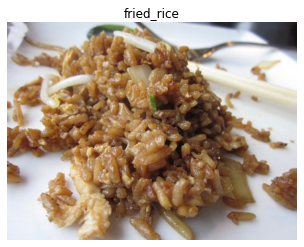

In [43]:
img = view_rand_image(target_dir = train_dir,
                      target_class = random.choice(class_names))

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')
     

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# create A Cnn model

In [16]:
#Set seed
tf.random.set_seed(42)

# Create our model (a clone of model_8, except to be multi-class)
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
     

In [19]:

# Fit the model
history_8 = model_9.fit(train_data, # now 10 different classes 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
235/235 [==============================] - 48s 197ms/step - loss: 2.1850 - accuracy: 0.1859 - val_loss: 2.0801 - val_accuracy: 0.2536
Epoch 2/5
235/235 [==============================] - 47s 202ms/step - loss: 1.9932 - accuracy: 0.2955 - val_loss: 2.0150 - val_accuracy: 0.2828
Epoch 3/5
235/235 [==============================] - 45s 193ms/step - loss: 1.6723 - accuracy: 0.4264 - val_loss: 2.0254 - val_accuracy: 0.3020
Epoch 4/5
235/235 [==============================] - 46s 197ms/step - loss: 1.1350 - accuracy: 0.6223 - val_loss: 2.4220 - val_accuracy: 0.2908
Epoch 5/5
235/235 [==============================] - 46s 195ms/step - loss: 0.5596 - accuracy: 0.8125 - val_loss: 3.3971 - val_accuracy: 0.2668


### evaluating the model

In [20]:
model_9.evaluate(test_data)

79/79 [==============================] - 11s 140ms/step - loss: 3.3971 - accuracy: 0.2668


[3.397113561630249, 0.2667999863624573]

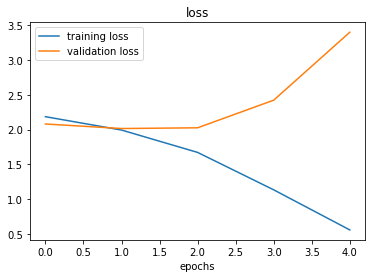

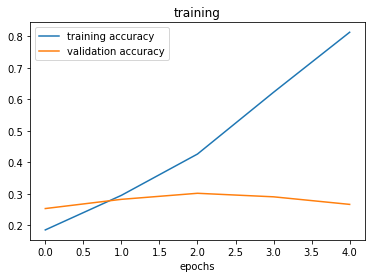

In [22]:
#check the model loass curves

plot_loss_curve(history_8)

The looss curves are telling us that the model is overfitting the training set quite badly. fails to generalize well on unseen data. performs poorly on the test data set

Adjusting the model and fixing the overfitting or trying to 
1. get more data
2. simplify the model - it may be too complicated with too many layers, one way to simplify is to reduce number of layers or reduce hidden units
3. data augmentation
4. Use transfer learning

In [24]:
#build new model
tf.random.set_seed(42)

#model
model_10 = Sequential([
    Conv2D(10, 3, activation= 'relu', input_shape=(224,224, 3)),
    MaxPool2D(),

    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),

    Flatten(),
    Dense(10, activation='softmax')
])

#compile
model_10.compile(loss='categorical_crossentropy',
                 optimizer=Adam(),
                 metrics=['accuracy'])

In [25]:
#fit
history_10 = model_10.fit(train_data,
                          epochs = 5,
                          steps_per_epoch=len(train_data),
                          validation_data= test_data,
                          validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 45s 188ms/step - loss: 2.0970 - accuracy: 0.2483 - val_loss: 1.9926 - val_accuracy: 0.2936
Epoch 2/5
235/235 [==============================] - 47s 200ms/step - loss: 1.8092 - accuracy: 0.3821 - val_loss: 1.8948 - val_accuracy: 0.3440
Epoch 3/5
235/235 [==============================] - 44s 185ms/step - loss: 1.4120 - accuracy: 0.5347 - val_loss: 2.0069 - val_accuracy: 0.3336
Epoch 4/5
235/235 [==============================] - 43s 183ms/step - loss: 0.8881 - accuracy: 0.7212 - val_loss: 2.2505 - val_accuracy: 0.3240
Epoch 5/5
235/235 [==============================] - 45s 192ms/step - loss: 0.4750 - accuracy: 0.8668 - val_loss: 2.8213 - val_accuracy: 0.3052


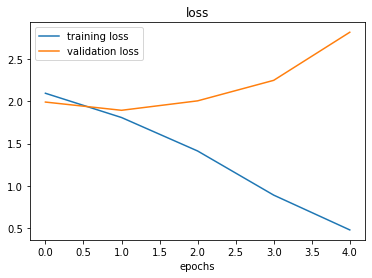

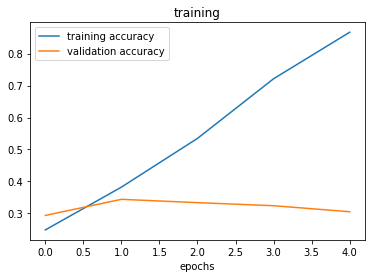

In [26]:
plot_loss_curve(history_10)

Ended up not improving the model at all becuase total params are the same

will 

In [29]:
#Augmenting data to see if it helps performance
train_aug_datagen = ImageDataGenerator(rescale = 1/255.,
                                       rotation_range = 0.2,
                                       width_shift_range=0.2,
                                       height_shift_range = 0.2,
                                       zoom_range=0.2,
                                       horizontal_flip =True)
train_data_augmented = train_aug_datagen.flow_from_directory(train_dir, 
                                         target_size = (224,224),
                                         batch_size= 32,
                                         class_mode = 'categorical')


Found 7500 images belonging to 10 classes.


In [30]:
#build model for aug data
model_11 = tf.keras.models.clone_model(model_9)


# Sequential([
#     Conv2D(10, 3, activation='relu', input_shape= (224,224,3)),
#     MaxPool2D(),

#     Conv2D(10, 3, activation ='relu')
#     MaxPool2D(),

#     Flatten(),
#     Dense(10, activation = 'softmax')
# ])

model_11.compile(loss='categorical_crossentropy',
                 optimizer = Adam(),
                 metrics = ['accuracy'])




In [31]:
history_11 = model_11.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch = len(train_data_augmented),
                          validation_data= test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 113s 479ms/step - loss: 2.2373 - accuracy: 0.1589 - val_loss: 2.0964 - val_accuracy: 0.2352
Epoch 2/5
235/235 [==============================] - 112s 478ms/step - loss: 2.1074 - accuracy: 0.2433 - val_loss: 1.9168 - val_accuracy: 0.3224
Epoch 3/5
235/235 [==============================] - 109s 464ms/step - loss: 1.9960 - accuracy: 0.3007 - val_loss: 1.9148 - val_accuracy: 0.3424
Epoch 4/5
235/235 [==============================] - 109s 465ms/step - loss: 1.9487 - accuracy: 0.3152 - val_loss: 1.7949 - val_accuracy: 0.3864
Epoch 5/5
235/235 [==============================] - 110s 468ms/step - loss: 1.9202 - accuracy: 0.3297 - val_loss: 1.8844 - val_accuracy: 0.3736


In [32]:
## save and load the model

model_11.save('saved model_11')

In [ ]:
#load model
model